# Machine Learning 

In [6]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
from numpy import mean

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

C:\Users\gsacc\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading in the data

Load the downloaded dta under the folder "Resources" to a variable named data

In [7]:
data=pd.read_csv("Resources/winequalityN.csv")

In [8]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data features

   Input variables (based on physicochemical tests):
   
       1 - fixed acidity
       2 - volatile acidity
       3 - citric acid
       4 - residual sugar
       5 - chlorides
       6 - free sulfur dioxide
       7 - total sulfur dioxide
       8 - density
       9 - pH
       10 - sulphates
       11 - alcohol
   Output variable (based on sensory data): 
   
       12 - quality (score between 0 and 10)

In [9]:
#Visualizing mian statistical metrics for the whole dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
#Filtering the dataset into white and red wine to evaluate its statictics individually
redWine=data[data['type'] == "red"]
whiteWine=data[data['type'] == "white"]

In [11]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As we can observe from the description of the separate type of wines, although the quality is vey approximate on average, the chemical components hve completely different profiles. Indicating that what makes white wine a good or bad wine is probably not the same for the red wines.

## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<AxesSubplot:>

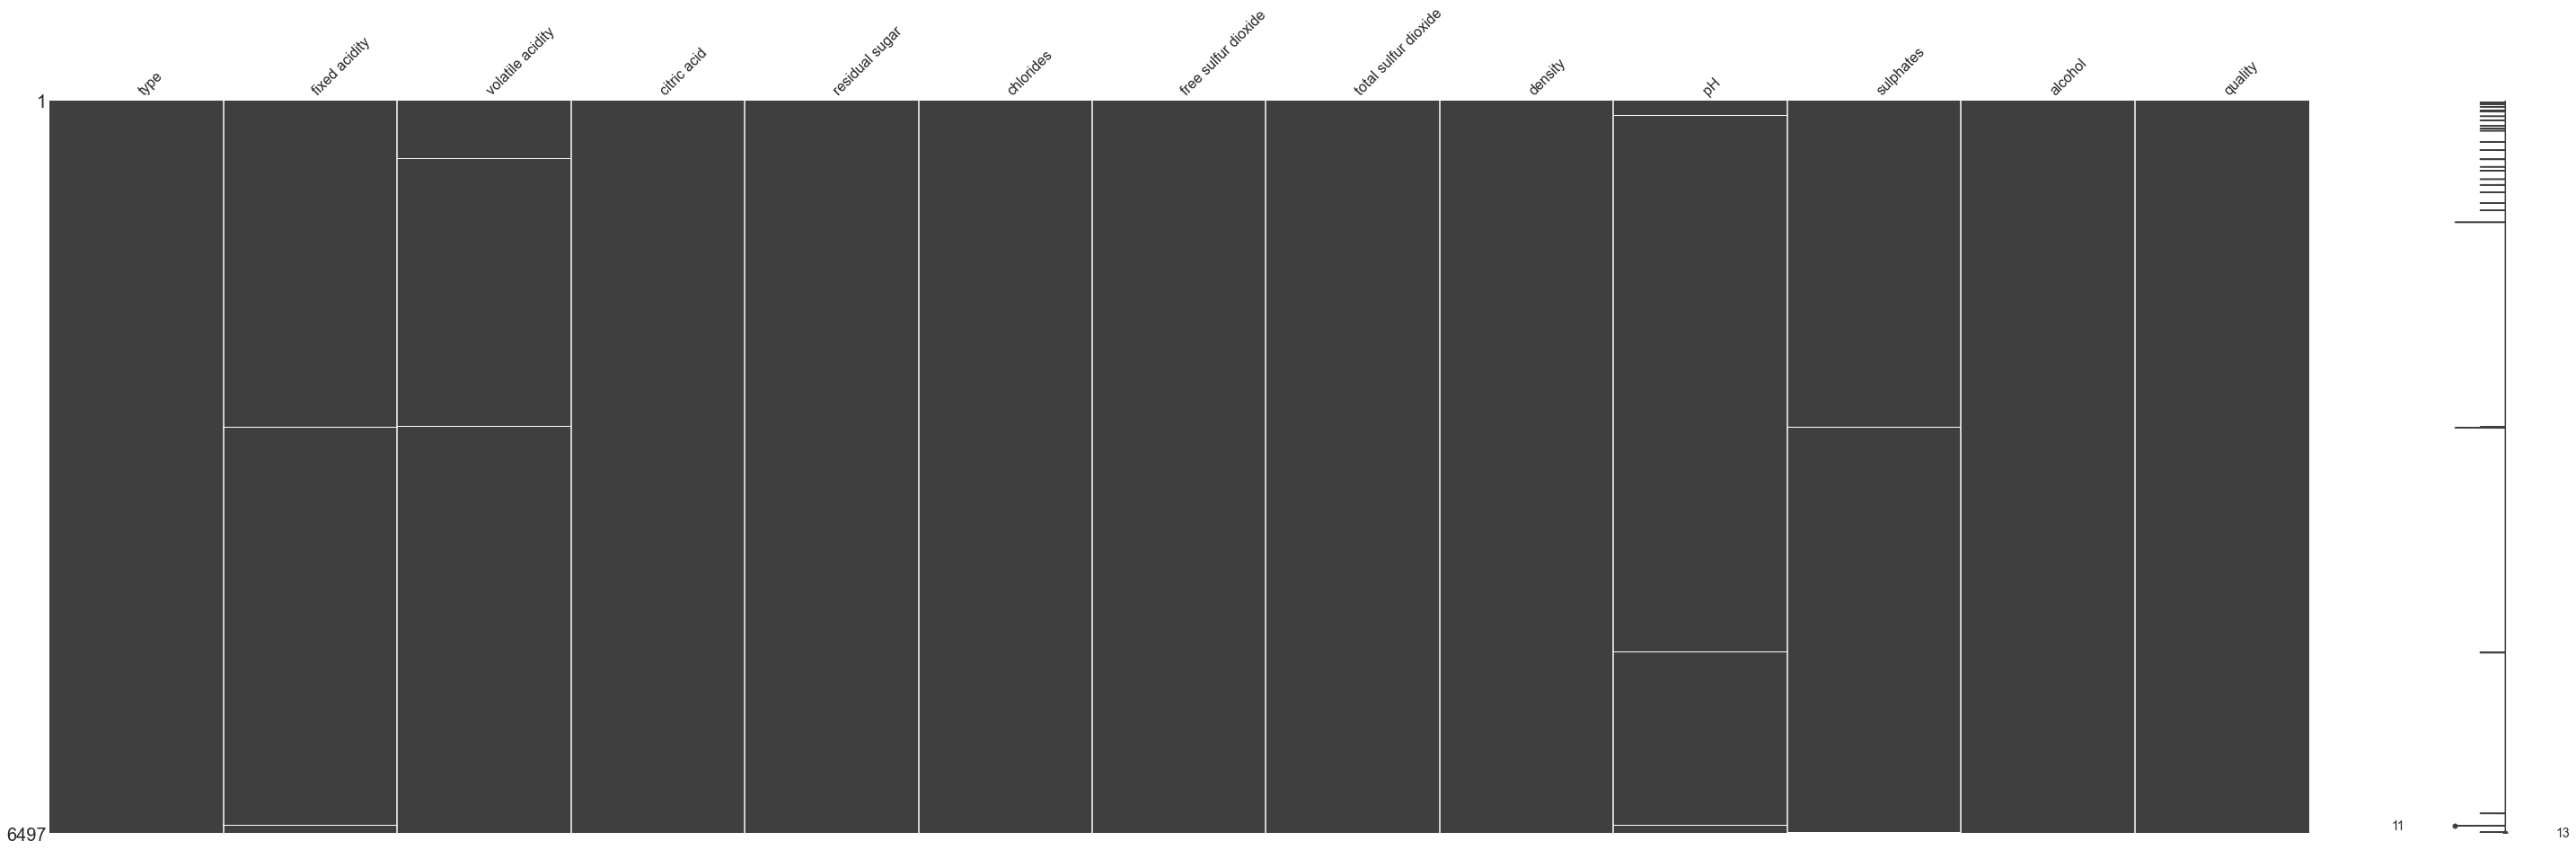

In [13]:
# Plot graphic of missing values
missingno.matrix(data, figsize = (50,15))

This is a unique scenario to find where you have a dataset which is almost absolutelly complete, wothout any missing values. This will allow more time to focus on finding the best model performance later on. We can visualize by the graph above that a tiny bit of ph levels are missing along with some fixed acidity and citric acid holes, almost too hard to visualize. We will be able to drop those values without compromising the dataset.

In [14]:
# Alternatively, you can see the number of missing values like this
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

From an Excel spreadsheet I could antecipate that a few of these missing values are in the same rows, which will minimize even more the impacts of its removal

## Visualize and analyse each feature and classify them

Here we will be able to visualize the distribution of each feature's frequency, remove the few missing values and separate them into categorical (one and only Output) and add them into our empty dataFrames. Everything will be done in duplicity, one for the white wine dataset and another for the red wine dataset. The empty dataFrames were cre

In [15]:
#Creating empty dataframes to separate the types of wines and transforming categorical into binary
red_bin = pd.DataFrame()
whi_bin = pd.DataFrame() 


### What datatypes are in the dataframe?

In [16]:
# Different data types in the dataset
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [17]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Target Feature:Quality

Description: Wine grade given by specialists based on taste test.
    
Ranges from 0 to 10, primarily we will consider wines with a grade 6 or greater a good wine otherwise a bad wine. Although they are numerical we will transform it in categorical/binary, at first in order to simplify our models later on.
    
This is the variable we want our machine learning model to predict based off all the others.

In [18]:
# Are there any missing values in the quality column?
data.quality.isnull().sum()

0

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


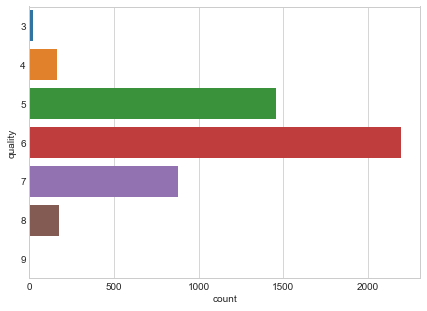

In [19]:
# Frequency of grade for white wine
fig = plt.figure(figsize=(7,5))
sns.countplot(y='quality', data=whiteWine);
print(whiteWine.quality.value_counts())

In [20]:
# add Sex to the subset dataframes
whi_bin['quality'] = whiteWine['quality']
whi_bin['quality'] = np.where(whi_bin['quality'] >=  6, 1, 0) # change quality to 0 for values lower than 6 and 1 for grater than 6

In [21]:
whi_bin.head()

,quality
0,1
1,1
2,1
3,1
4,1


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


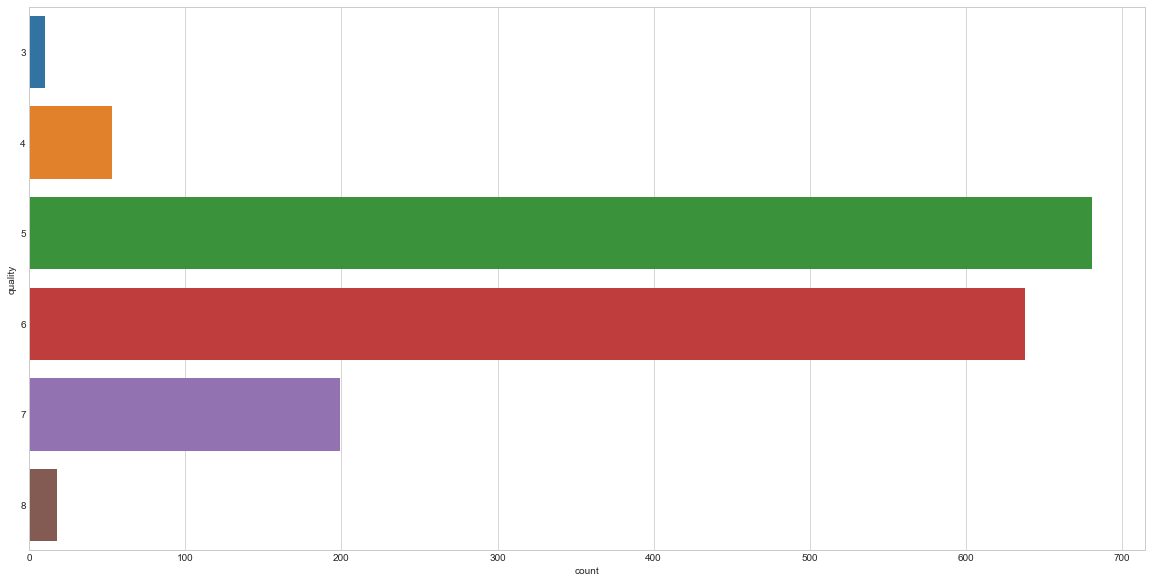

In [22]:
# Frequency of grade for red wine
fig = plt.figure(figsize=(20,10))
sns.countplot(y='quality', data=redWine);
print(redWine.quality.value_counts())

In [23]:
# add to the subset dataframes
red_bin['quality'] = redWine['quality']
red_bin['quality'] = np.where(red_bin['quality'] >=  6, 1, 0) # change quality to 0 for values lower than 6 and 1 for grater than 6

In [24]:
red_bin.head()

,quality
4898,0
4899,0
4900,0
4901,1
4902,0


### Target Feature:Alcohol

Description: Wine alcohol grade.
    
Numerical value acttually represents the percentage.

In [25]:
# Are there any missing values in the alcohol column?
data.alcohol.isnull().sum()

0

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

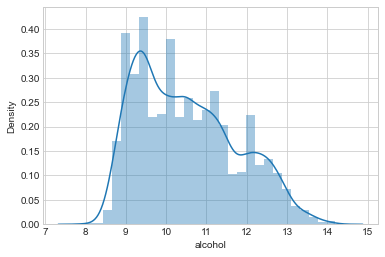

In [26]:
sns.distplot(whiteWine.alcohol)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

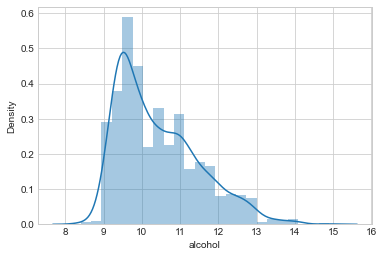

In [27]:
sns.distplot(redWine.alcohol)

In [28]:
#Add alcohol to sub df
whi_bin['alcohol'] = whiteWine['alcohol']

In [29]:
#same
red_bin['alcohol'] = redWine['alcohol']

### Target Feature: sulphates

Description: Wine sulphates level.
    

In [30]:
# Are there any missing values in the sulphates column?
whiteWine.sulphates.isnull().sum()

2

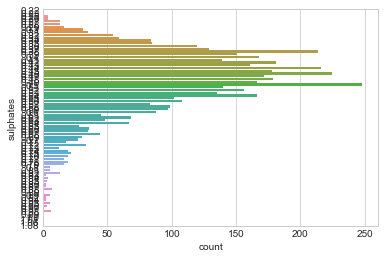

In [31]:
# What do the counts look like?
sns.countplot(y='sulphates', data=whiteWine);

In [32]:
#Add sulphates to sub df
whi_bin['sulphates'] = whiteWine['sulphates']

In [33]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['sulphates'])

In [34]:
# Are there any missing values in the sulphates column?
redWine.sulphates.isnull().sum()

2

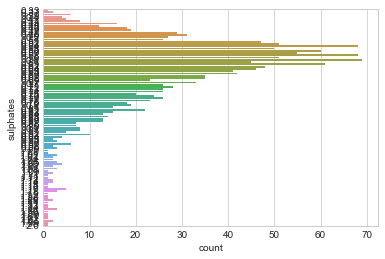

In [35]:
# What do the counts look like?
sns.countplot(y='sulphates', data=redWine);

In [36]:
#Add sulphates to sub df
red_bin['sulphates'] = redWine['sulphates']

In [37]:
#Remove missing values
red_bin = red_bin.dropna(subset=['sulphates'])
print(len(red_bin))

1597


### Target Feature: pH

Description: Wine pH level.

In [38]:
# Are there any missing values in the pH column?
whiteWine.pH.isnull().sum()

7

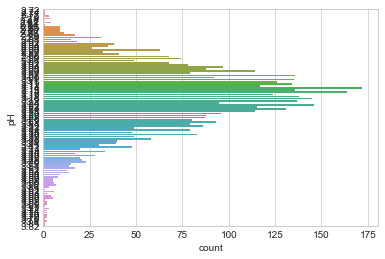

In [39]:
# What do the counts look like?
sns.countplot(y='pH', data=whiteWine);

In [40]:
#Add PH to sub df
whi_bin['pH'] = whiteWine['pH']

In [41]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['pH'])
print(len(whi_bin))

4889


In [42]:
# Are there any missing values in the pH column?
redWine.pH.isnull().sum()

2

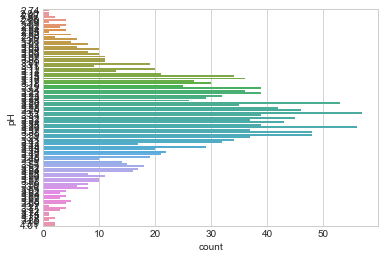

In [43]:
# What do the counts look like?
sns.countplot(y='pH', data=redWine);

In [44]:
#Add to sub dfs
red_bin['pH'] = redWine['pH']

In [45]:
#Remove missing values
red_bin = red_bin.dropna(subset=['pH'])
print(len(red_bin))

1595


### Target Feature: Density

Description: Wine density level.

In [46]:
# Are there any missing values in the column?
data.density.isnull().sum()

0

<AxesSubplot:xlabel='density', ylabel='Density'>

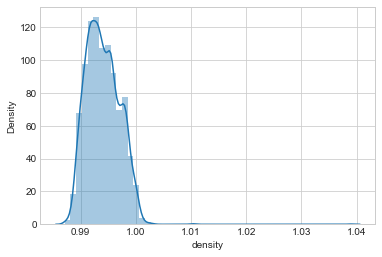

In [47]:
sns.distplot(whiteWine.density)

In [48]:
#Add density to sub df
whi_bin['density'] = whiteWine['density']

<AxesSubplot:xlabel='density', ylabel='Density'>

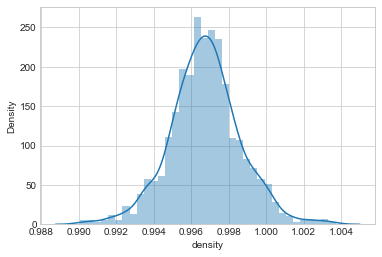

In [49]:
sns.distplot(redWine.density)

In [50]:
#same
red_bin['density'] = redWine['density']

### Target Feature: total sulfur dioxide

Description: Wine total sulfur dioxide level.

In [51]:
# Are there any missing values in the column?
data['total sulfur dioxide'].isnull().sum()

0

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

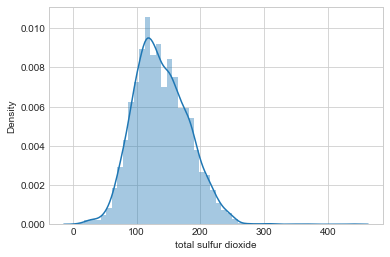

In [52]:
sns.distplot(whiteWine['total sulfur dioxide'])

In [53]:
#Add to sub df
whi_bin['total sulfur dioxide'] = whiteWine['total sulfur dioxide']

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

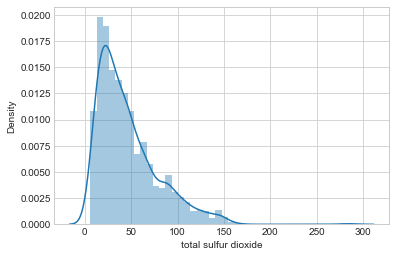

In [54]:
sns.distplot(redWine['total sulfur dioxide'])

In [55]:
#same
red_bin['total sulfur dioxide'] = redWine['total sulfur dioxide']

### Target Feature: free sulfur dioxide

Description: Wine free sulfur dioxide level.

In [56]:
# Are there any missing values in the column?
data['free sulfur dioxide'].isnull().sum()

0

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

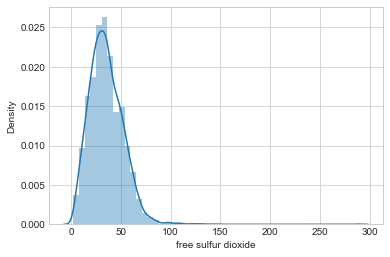

In [57]:
sns.distplot(whiteWine['free sulfur dioxide'])

In [58]:
#Add to sub df
whi_bin['free sulfur dioxide'] = whiteWine['free sulfur dioxide']

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

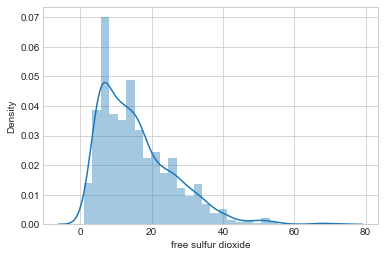

In [59]:
sns.distplot(redWine['free sulfur dioxide'])

In [60]:
#same
red_bin['free sulfur dioxide'] = redWine['free sulfur dioxide']

### Target Feature: Chlorides

Description: Wine chloride level.

In [61]:
# Are there any missing values in the chlorides column?
whiteWine.chlorides.isnull().sum()

2

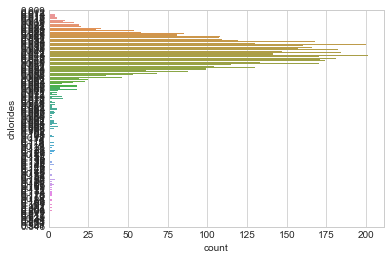

In [62]:
# What do the counts look like?
sns.countplot(y='chlorides', data=whiteWine);

In [63]:
#Add PH to sub df
whi_bin['chlorides'] = whiteWine['chlorides']

In [64]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['chlorides'])
print(len(whi_bin))

4887


In [65]:
# Are there any missing values in the chlorides column?
redWine.chlorides.isnull().sum()

0

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

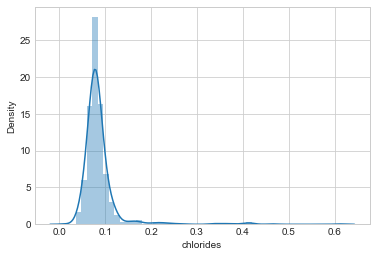

In [66]:
# What do the counts look like?
sns.distplot(redWine.chlorides)

In [67]:
#Add to sub dfs
red_bin['chlorides'] = redWine['chlorides']

### Target Feature: residual sugar

Description: Wine residual sugar level.

In [68]:
# Are there any missing values in the residual sugar column?
whiteWine['residual sugar'].isnull().sum()

2

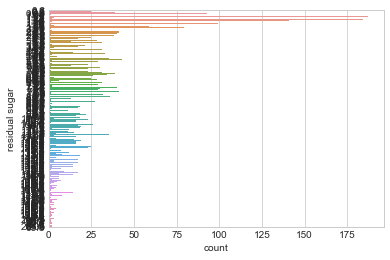

In [69]:
# What do the counts look like?
sns.countplot(y='residual sugar', data=whiteWine);

In [70]:
#Add PH to sub df
whi_bin['residual sugar'] = whiteWine['residual sugar']

In [71]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['residual sugar'])
print(len(whi_bin))

4885


In [72]:
# Are there any missing values in the residual sugar column?
redWine['residual sugar'].isnull().sum()

0

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

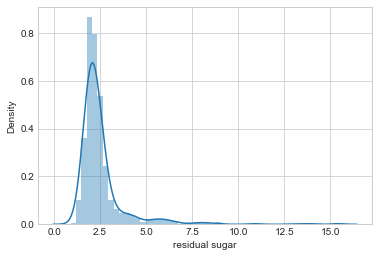

In [73]:
# What do the counts look like?
# What do the counts look like?
sns.distplot(redWine['residual sugar'])

In [74]:
#Add to sub dfs
red_bin['residual sugar'] = redWine['residual sugar']

### Target Feature: citric acid

Description: Wine citric acid level.

In [75]:
# Are there any missing values in the citric acid column?
whiteWine['citric acid'].isnull().sum()

2

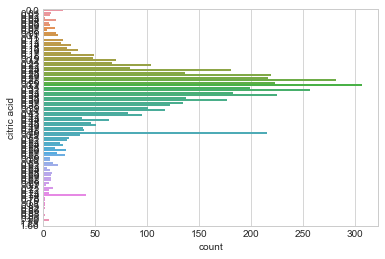

In [76]:
# What do the counts look like?
sns.countplot(y='citric acid', data=whiteWine);

In [77]:
#Add PH to sub df
whi_bin['citric acid'] = whiteWine['citric acid']

In [78]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['citric acid'])
print(len(whi_bin))

4883


In [79]:
# Are there any missing values in the citric acid column?
redWine['citric acid'].isnull().sum()

1

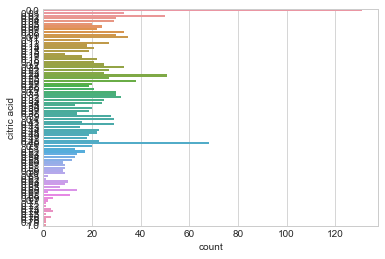

In [80]:
# What do the counts look like?
sns.countplot(y='citric acid', data=redWine);

In [81]:
#Add to sub dfs
red_bin['citric acid'] = redWine['citric acid']

In [82]:
#Remove missing values
red_bin = red_bin.dropna(subset=['citric acid'])
print(len(red_bin))

1594


### Target Feature: volatile acidity

Description: Wine volatile acidity level.

In [83]:
# Are there any missing values in the volatile acidity column?
whiteWine['volatile acidity'].isnull().sum()

7

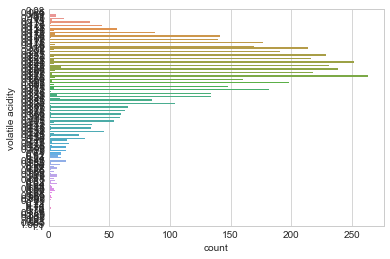

In [84]:
# What do the counts look like?
sns.countplot(y='volatile acidity', data=whiteWine);

In [85]:
#Add PH to sub df
whi_bin['volatile acidity'] = whiteWine['volatile acidity']

In [86]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['volatile acidity'])
print(len(whi_bin))

4876


In [87]:
# Are there any missing values in the volatile acidity column?
redWine['volatile acidity'].isnull().sum()

1

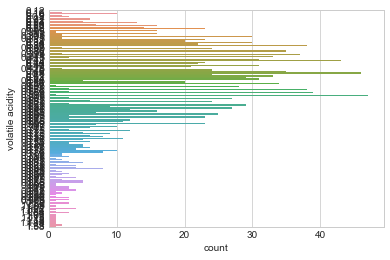

In [88]:
# What do the counts look like?
sns.countplot(y='volatile acidity', data=redWine);

In [89]:
#Add to sub dfs
red_bin['volatile acidity'] = redWine['volatile acidity']

In [90]:
#Remove missing values
red_bin = red_bin.dropna(subset=['volatile acidity'])
print(len(red_bin))

1593


### Target Feature: fixed acidity

Description: Wine fixed acidity level.

In [91]:
# Are there any missing values in the fixed acidity column?
whiteWine['fixed acidity'].isnull().sum()

8

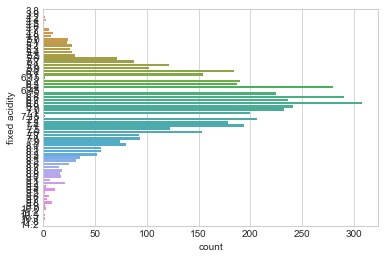

In [92]:
# What do the counts look like?
sns.countplot(y='fixed acidity', data=whiteWine);

In [93]:
#Add PH to sub df
whi_bin['fixed acidity'] = whiteWine['fixed acidity']

In [94]:
#Remove missing values
whi_bin = whi_bin.dropna(subset=['fixed acidity'])
print(len(whi_bin))

4870


In [95]:
# Are there any missing values in the fixed acidity column?
redWine['fixed acidity'].isnull().sum()

2

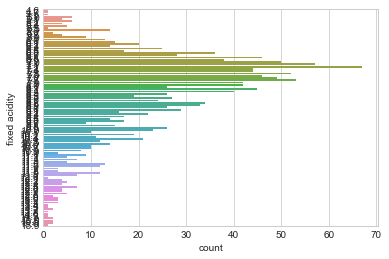

In [96]:
# What do the counts look like?
sns.countplot(y='fixed acidity', data=redWine);

In [97]:
#Add to sub dfs
red_bin['fixed acidity'] = redWine['fixed acidity']

In [98]:
#Remove missing values
red_bin = red_bin.dropna(subset=['fixed acidity'])
print(len(red_bin))

1593


## Feature Encoding

 There is no need for this step since there were no categorical data other that the output in the previous step. The output variable is already converted to binary

In [99]:
whi_bin.head()

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
0,1,8.8,0.45,3.00,1.0010,170.0,45.0,0.045,20.7,0.36,0.27,7.0
1,1,9.5,0.49,3.30,0.9940,132.0,14.0,0.049,1.6,0.34,0.30,6.3
2,1,10.1,0.44,3.26,0.9951,97.0,30.0,0.050,6.9,0.40,0.28,8.1
3,1,9.9,0.40,3.19,0.9956,186.0,47.0,0.058,8.5,0.32,0.23,7.2
4,1,9.9,0.40,3.19,0.9956,186.0,47.0,0.058,8.5,0.32,0.23,7.2


In [100]:
red_bin.head()

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
4898,0,9.4,0.56,3.51,0.9978,34.0,11.0,0.076,1.9,0.00,0.70,7.4
4899,0,9.8,0.68,3.20,0.9968,67.0,25.0,0.098,2.6,0.00,0.88,7.8
4900,0,9.8,0.65,3.26,0.9970,54.0,15.0,0.092,2.3,0.04,0.76,7.8
4901,1,9.8,0.58,3.16,0.9980,60.0,17.0,0.075,1.9,0.56,0.28,11.2
4902,0,9.4,0.56,3.51,0.9978,34.0,11.0,0.076,1.9,0.00,0.70,7.4


## Start Building Machine Learning Models

Now our data has been manipulating and cleaned, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data
First we will separate the data into X and y variables (or predictores and response), and than split the data into train and test dataset in order to fit our model in the training Dataset against our test afterwards.

In [101]:
#X and y for WHITE wine dataset
XW= whi_bin.drop('quality', axis=1) 
yw = whi_bin.quality

In [102]:
#X and y for RED wine dataset
XR= red_bin.drop('quality', axis=1) 
yr = red_bin.quality

In [103]:
#X_train,test and y for WHITE wine dataset
XW_train, XW_test, yw_train, yw_test = train_test_split(XW, yw, test_size=0.3, random_state=42)

In [104]:
#X_train,test and y for RED wine dataset
XR_train, XR_test, yr_train, yr_test = train_test_split(XR, yr, test_size=0.3, random_state=42)

### Define a function to fit machine learning algorithms

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [105]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [106]:
# Logistic Regression for WHITE WINE
start_time = time.time()
train_pred_logW, acc_logW, acc_cv_logW = fit_ml_algo(LogisticRegression(), XW_train, yw_train,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logW)
print("Accuracy CV 10-Fold: %s" % acc_cv_logW)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 74.48
Accuracy CV 10-Fold: 74.39
Running Time: 0:00:00.434837


In [107]:
# Logistic Regression for RED WINE
start_time = time.time()
train_pred_logR, acc_logR, acc_cv_logR = fit_ml_algo(LogisticRegression(), XR_train, yr_train,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logR)
print("Accuracy CV 10-Fold: %s" % acc_cv_logR)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 75.43
Accuracy CV 10-Fold: 75.7
Running Time: 0:00:00.328095


### K-Nearest Neighbours

In [108]:
# k-Nearest Neighbours for WHITE WINE
start_time = time.time()
train_pred_knnW, acc_knnW, acc_cv_knnW = fit_ml_algo(KNeighborsClassifier(), 
                                                  XW_train, 
                                                  yw_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knnW)
print("Accuracy CV 10-Fold: %s" % acc_cv_knnW)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 79.99
Accuracy CV 10-Fold: 69.46
Running Time: 0:00:00.222405


In [109]:
# k-Nearest Neighbours for RED WINE
start_time = time.time()
train_pred_knnR, acc_knnR, acc_cv_knnR = fit_ml_algo(KNeighborsClassifier(), 
                                                  XR_train, 
                                                  yr_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knnR)
print("Accuracy CV 10-Fold: %s" % acc_cv_knnR)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 75.52
Accuracy CV 10-Fold: 61.26
Running Time: 0:00:00.087765


### Gaussian Naive Bayes

In [110]:
# Gaussian Naive Bayes for WHITE WINE
start_time = time.time()
train_pred_gaussianW, acc_gaussianW, acc_cv_gaussianW = fit_ml_algo(GaussianNB(), 
                                                                      XW_train, 
                                                                      yw_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussianW)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussianW)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 70.31
Accuracy CV 10-Fold: 69.84
Running Time: 0:00:00.032957


In [111]:
# Gaussian Naive Bayes for RED WINE
start_time = time.time()
train_pred_gaussianR, acc_gaussianR, acc_cv_gaussianR = fit_ml_algo(GaussianNB(), 
                                                                      XR_train, 
                                                                      yr_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussianR)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussianR)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 73.45
Accuracy CV 10-Fold: 73.09
Running Time: 0:00:00.027966


### Linear Support Vector Machines (SVC)

In [112]:
# Linear SVC for WHITE WINE
start_time = time.time()
train_pred_svcW, acc_linear_svcW, acc_cv_linear_svcW = fit_ml_algo(LinearSVC(),
                                                                XW_train, 
                                                                yw_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svcW)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svcW)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 68.85
Accuracy CV 10-Fold: 53.62
Running Time: 0:00:01.282569


In [113]:
# Linear SVC for RED WINE
start_time = time.time()
train_pred_svcR, acc_linear_svcR, acc_cv_linear_svcR = fit_ml_algo(LinearSVC(),
                                                                XR_train, 
                                                                yr_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svcR)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svcR)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 74.98
Accuracy CV 10-Fold: 66.19
Running Time: 0:00:00.375994


### Stochastic Gradient Descent

In [114]:
# Stochastic Gradient Descent for WHITE WINE
start_time = time.time()
train_pred_sgdW, acc_sgdW, acc_cv_sgdW = fit_ml_algo(SGDClassifier(), 
                                                  XW_train, 
                                                  yw_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgdW)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdW)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 67.03
Accuracy CV 10-Fold: 65.03
Running Time: 0:00:00.220407


In [115]:
# Stochastic Gradient Descent for RED WINE
start_time = time.time()
train_pred_sgdR, acc_sgdR, acc_cv_sgdR = fit_ml_algo(SGDClassifier(), 
                                                  XR_train, 
                                                  yr_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgdR)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdR)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.88
Accuracy CV 10-Fold: 64.39
Running Time: 0:00:00.054882


### Decision Tree Classifier

In [116]:
# Decision Tree Classifier for WHITE WINE
start_time = time.time()
train_pred_dtW, acc_dtW, acc_cv_dtW = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XW_train, 
                                                                yw_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtW)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtW)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 77.0
Running Time: 0:00:00.182510


In [117]:
# Decision Tree Classifier for RED WINE
start_time = time.time()
train_pred_dtR, acc_dtR, acc_cv_dtR = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XR_train, 
                                                                yr_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtR)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtR)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 76.23
Running Time: 0:00:00.066850


### Gradient Boost Trees

In [118]:
# Gradient Boosting Trees for WHITE WINE
start_time = time.time()
train_pred_gbtW, acc_gbtW, acc_cv_gbtW = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XW_train, 
                                                                       yw_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtW)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtW)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 83.54
Accuracy CV 10-Fold: 79.08
Running Time: 0:00:04.080115


In [119]:
# Gradient Boosting Trees for RED WINE
start_time = time.time()
train_pred_gbtR, acc_gbtR, acc_cv_gbtR = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XR_train, 
                                                                       yr_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtR)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtR)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 87.62
Accuracy CV 10-Fold: 75.52
Running Time: 0:00:01.690478


### Regular accuracy scores for White Wines on train dataset

In [120]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knnW, 
        acc_logW,  
        acc_gaussianW, 
        acc_sgdW, 
        acc_linear_svcW, 
        acc_dtW,
        acc_gbtW
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,83.54
0,KNN,79.99
1,Logistic Regression,74.48
2,Naive Bayes,70.31
4,Linear SVC,68.85
3,Stochastic Gradient Decent,67.03


In [121]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knnW, 
        acc_cv_logW,      
        acc_cv_gaussianW, 
        acc_cv_sgdW, 
        acc_cv_linear_svcW, 
        acc_cv_dtW,
        acc_cv_gbtW
        
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,79.08
5,Decision Tree,77.00
1,Logistic Regression,74.39
2,Naive Bayes,69.84
0,KNN,69.46
3,Stochastic Gradient Decent,65.03
4,Linear SVC,53.62


### Regular accuracy scores for Red Wines on Train Dataset

In [122]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knnR, 
        acc_logR,  
        acc_gaussianR, 
        acc_sgdR, 
        acc_linear_svcR, 
        acc_dtR,
        acc_gbtR 
    ]})

print("---Reguglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reguglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,87.62
0,KNN,75.52
1,Logistic Regression,75.43
4,Linear SVC,74.98
2,Naive Bayes,73.45
3,Stochastic Gradient Decent,61.88


In [123]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knnR, 
        acc_cv_logR,      
        acc_cv_gaussianR, 
        acc_cv_sgdR, 
        acc_cv_linear_svcR, 
        acc_cv_dtR,
        acc_cv_gbtR
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,Decision Tree,76.23
1,Logistic Regression,75.70
6,Gradient Boosting Trees,75.52
2,Naive Bayes,73.09
4,Linear SVC,66.19
3,Stochastic Gradient Decent,64.39
0,KNN,61.26


Gradient boosting trees was the model that displayed the best performance in both Red and White wines dataaset. Going forward the work should be focusing on improving the features in this model and compare its performance against the dataset.

## Applying model to Test dataset


### Logistic Regression

In [124]:
# Logistic Regression for WHITE WINE
start_time = time.time()
train_pred_logW, acc_logW, acc_cv_log5 = fit_ml_algo(LogisticRegression(), XW_test, yw_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logW)
print("Accuracy CV 10-Fold: %s" % acc_cv_logW)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 75.09
Accuracy CV 10-Fold: 74.39
Running Time: 0:00:00.338096


In [125]:
# Logistic Regression for RED WINE
start_time = time.time()
train_pred_logR, acc_logR, acc_cv_logR = fit_ml_algo(LogisticRegression(), XR_test, yr_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logR)
print("Accuracy CV 10-Fold: %s" % acc_cv_logR)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 73.64
Accuracy CV 10-Fold: 71.97
Running Time: 0:00:00.183536


### Decision Tree Classifier

In [126]:
# Decision Tree Classifier for WHITE WINE
start_time = time.time()
test_pred_dtWT, acc_dtWT, acc_cv_dtWT = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XW_test, 
                                                                yw_test,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtWT)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtWT)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 70.84
Running Time: 0:00:00.083803


In [127]:
# Decision Tree Classifier for RED WINE
start_time = time.time()
test_pred_dtRT, acc_dtRT, acc_cv_dtRT = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XR_test, 
                                                                yr_test,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtRT)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtRT)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 63.81
Running Time: 0:00:00.040890


### Gradient Boost Trees

In [128]:
# Gradient Boosting Trees for WHITE WINE
start_time = time.time()
test_pred_gbtWT, acc_gbtWT, acc_cv_gbtWT = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XW_test, 
                                                                       yw_test,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtWT)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtWT)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 87.61
Accuracy CV 10-Fold: 78.44
Running Time: 0:00:02.073426


In [129]:
# Gradient Boosting Trees for RED WINE
start_time = time.time()
test_pred_gbtRT, acc_gbtRT, acc_cv_gbtRT = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XR_test, 
                                                                       yr_test,
                                                                       10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtRT)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtRT)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 95.61
Accuracy CV 10-Fold: 72.59
Running Time: 0:00:00.972426


We can see here that the cross_validation avoids overfitting in the test dataset

---------------------------

## What attributes in terms of chemical components contributes for a good wine? What would make the best wine possible? 

### Best Features for White wine

In [132]:
## Feature Importance
best_modelW = GradientBoostingClassifier( )
best_modelW.fit(XW_train, yw_train)

GradientBoostingClassifier()

In [133]:
# Plot the feature importance scores
feature_importance(best_modelW, XW_train)

NameError: name 'feature_importance' is not defined

### Best Features for Red wine

In [134]:
## Feature Importance
best_modelR = GradientBoostingClassifier( )
best_modelR.fit(XR_train, yr_train)

GradientBoostingClassifier()

In [135]:
# Plot the feature importance scores
feature_importance(best_modelR, XR_train)

NameError: name 'feature_importance' is not defined

-------------------------------

## Are there any differences between the wine composition, quality perceived and whether the wine is red or white?

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


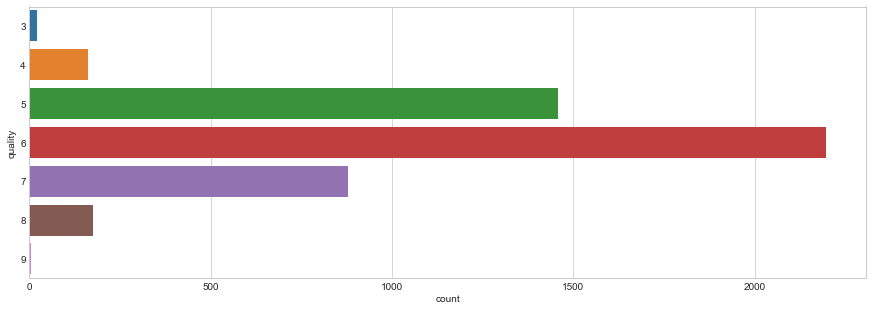

In [136]:
# Frequency of grade for white wine
fig = plt.figure(figsize=(15,5))
sns.countplot(y='quality', data=whiteWine);
print(whiteWine.quality.value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


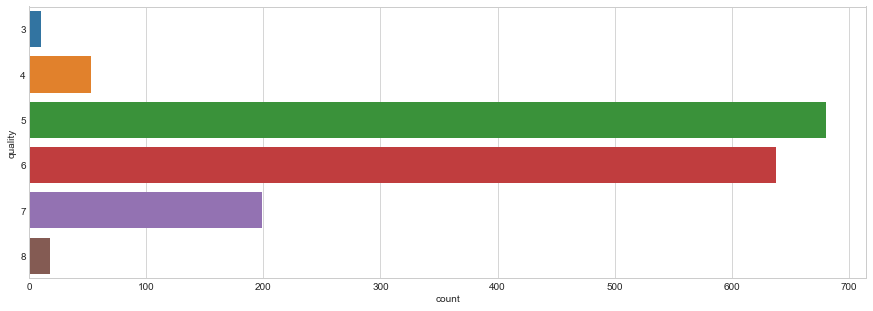

In [137]:
# Frequency of grade for red wine
fig = plt.figure(figsize=(15,5))
sns.countplot(y='quality', data=redWine);
print(redWine.quality.value_counts())


In [138]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [139]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [140]:
bestWhites = whiteWine.loc[(whiteWine.quality >= 6)]

In [141]:
bestReds =  redWine.loc[(redWine.quality >= 6)]

In [142]:
bestWhites.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3254.000000,3253.000000,3257.000000,3256.000000,3257.000000,3258.000000,3258.000000,3258.000000,3253.000000,3257.000000,3258.000000,3258.000000
mean,6.801398,0.262080,0.334212,6.060212,0.042927,35.292664,133.207489,0.993457,3.197141,0.494031,10.848880,6.382136
std,0.817410,0.090121,0.108231,4.929779,0.018262,15.138910,39.097152,0.003032,0.153527,0.120187,1.247434,0.594014
min,3.800000,0.080000,0.000000,0.700000,0.012000,3.000000,18.000000,0.987110,2.720000,0.220000,8.500000,6.000000
25%,6.300000,0.200000,0.270000,1.700000,0.034000,25.000000,105.000000,0.991182,3.090000,0.410000,9.800000,6.000000
50%,6.800000,0.250000,0.320000,4.750000,0.040000,34.000000,128.000000,0.992990,3.190000,0.480000,10.800000,6.000000
75%,7.300000,0.310000,0.380000,9.112500,0.048000,45.000000,158.000000,0.995420,3.300000,0.560000,11.900000,7.000000
max,14.200000,0.965000,1.660000,65.800000,0.255000,112.000000,294.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [143]:
bestReds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,854.00000,854.000000,854.000000,855.000000,855.000000,855.000000,855.000000,855.000000,854.000000,854.000000,855.000000,855.000000
mean,8.47623,0.473929,0.300234,2.535965,0.082661,15.272515,39.352047,0.996467,3.310515,0.692541,10.855029,6.274854
std,1.86278,0.161969,0.199742,1.424835,0.037258,10.038538,27.253280,0.002067,0.154599,0.155632,1.106109,0.491627
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.390000,8.400000,6.000000
25%,7.10000,0.350000,0.120000,1.900000,0.067000,7.000000,20.000000,0.995185,3.210000,0.590000,10.000000,6.000000
50%,8.00000,0.460000,0.310000,2.200000,0.077000,13.000000,33.000000,0.996400,3.310000,0.660000,10.800000,6.000000
75%,9.67500,0.580000,0.460000,2.600000,0.087500,20.500000,50.000000,0.997685,3.400000,0.770000,11.700000,7.000000
max,15.60000,1.040000,0.780000,15.400000,0.415000,72.000000,289.000000,1.003690,4.010000,1.950000,14.000000,8.000000


----------------------------

# Try to improve accuracy of the best models

## Applying best performing models only on the 5 most relevant predictors

In [144]:
#X and y for WHITE wine dataset
XW5= whi_bin.drop(['quality','chlorides','pH','sulphates','fixed acidity','density','total sulfur dioxide'], axis=1) 
yw5 = whi_bin.quality
#X and y for RED wine dataset
XR5= red_bin.drop(['quality','citric acid','pH','residual sugar', 'density','fixed acidity'], axis=1) 
yr5 = red_bin.quality
#X_train,test and y for WHITE wine dataset
XW5_train, XW5_test, yw5_train, yw5_test = train_test_split(XW5, yw5, test_size=0.3, random_state=42)
#X_train,test and y for RED wine dataset
XR5_train, XR5_test, yr5_train, yr5_test = train_test_split(XR5, yr5, test_size=0.3, random_state=42)

### Gradient Boosting Classifier

In [145]:
#Try the best models in the reduced dataset
# Gradient Boosting Trees for WHITE WINE
start_time = time.time()
test_pred_gbtWT5, acc_gbtWT5, acc_cv_gbtWT5 = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XW5_test, 
                                                                       yw5_test,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtWT5)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtWT5)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))


Accuracy: 84.26
Accuracy CV 10-Fold: 77.07
Running Time: 0:00:01.207769


In [146]:
# Gradient Boosting Trees for RED WINE
start_time = time.time()
test_pred_gbtRT5, acc_gbtRT5, acc_cv_gbtRT5 = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       XR5_test, 
                                                                       yr5_test,
                                                                       10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbtRT5)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbtRT5)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))


Accuracy: 93.93
Accuracy CV 10-Fold: 72.59
Running Time: 0:00:00.709124


### Logistic Regression

In [147]:
# Logistic Regression for WHITE WINE
start_time = time.time()
train_pred_logW5, acc_logW5, acc_cv_logW5 = fit_ml_algo(LogisticRegression(), XW5_test, yw5_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logW5)
print("Accuracy CV 10-Fold: %s" % acc_cv_logW5)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 74.88
Accuracy CV 10-Fold: 74.54
Running Time: 0:00:00.151596


In [148]:
# Logistic Regression for RED WINE
start_time = time.time()
train_pred_logR5, acc_logR5, acc_cv_logR5 = fit_ml_algo(LogisticRegression(), XR5_test, yr5_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_logR5)
print("Accuracy CV 10-Fold: %s" % acc_cv_logR5)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 73.22
Accuracy CV 10-Fold: 73.01
Running Time: 0:00:00.138628


### Decision Tree Classifier

In [149]:
# Decision Tree Classifier for WHITE WINE
start_time = time.time()
test_pred_dtWT5, acc_dtWT5, acc_cv_dtWT5 = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XW5_test, 
                                                                yw5_test,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtWT5)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtWT5)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 70.7
Running Time: 0:00:00.051861


In [150]:
# Decision Tree Classifier for RED WINE
start_time = time.time()
test_pred_dtRT5, acc_dtRT5, acc_cv_dtRT5 = fit_ml_algo(DecisionTreeClassifier(), 
                                                                XR5_test, 
                                                                yr5_test,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dtRT5)
print("Accuracy CV 10-Fold: %s" % acc_cv_dtRT5)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 64.23
Running Time: 0:00:00.031915


### Tuning gradient boost paramenters for white wine

In [151]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(XW_train, yw_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [152]:
print(F"THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: {tuning.best_score_},{tuning.best_params_}")

THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: 0.814315242807498,{'learning_rate': 0.1, 'n_estimators': 750}


In [153]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning2 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=5)
tuning2.fit(XW_train, yw_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_features='sqrt',
                                                  n_estimators=1500,
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [154]:
print(F"THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: {tuning2.best_score_},{tuning2.best_params_}")

THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: 0.8204770455729673,{'max_depth': 7}


### Apply optimized model to test

In [155]:
optimized_model1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
optimized_model1.fit(XW_train, yw_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='sqrt',
                           n_estimators=750, random_state=10, subsample=1)

In [156]:
print('Accuracy of the GBM on test set: {:.3f}'.format(optimized_model1.score(XW_test, yw_test)))

Accuracy of the GBM on test set: 0.830


-----------------------------------------

### Tuning gradient boost paramenters for red wine

In [157]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning3 = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning3.fit(XR_train, yr_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [158]:
print(F"THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: {tuning3.best_score_},{tuning3.best_params_}")

THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: 0.7892376681614349,{'learning_rate': 0.01, 'n_estimators': 1750}


In [159]:
p_test4 = {'max_depth':[2,3,4,5,6,7] }
tuning4 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4, cv=5)
tuning4.fit(XR_train, yr_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_features='sqrt',
                                                  n_estimators=1500,
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [160]:
print(F"THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: {tuning4.best_score_},{tuning4.best_params_}")

THE BEST SCORE IN  THE TRAINING DATASET AND ITS PARAMETERS ARE AS FOLOWS: 0.7928251121076233,{'max_depth': 5}


### Apply optimized model to test

In [161]:
optimized_model2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
optimized_model2.fit(XR_train, yr_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           n_estimators=1500, random_state=10, subsample=1)

In [162]:
print('Accuracy of the GBM on test set: {:.3f}'.format(optimized_model2.score(XR_test, yr_test)))

Accuracy of the GBM on test set: 0.793
